# Instructions pour installer les Jupyter Widgets

1/ installer "Matplotlib Jupyter Extension"

2/ sur console python, saisir : pip install ipympl

3/ Installer les "Jupyter Widgets"

4/ pip install ipywidgets

Informations détaillées ipywidgets :
https://ipywidgets.readthedocs.io/en/latest/user_install.html

Informations détaillées ipympl :
https://pypi.org/project/ipympl/#files    

# Les Jupyter Widgets permettent de controler les figures (zoom, sauvegarde, etc) et d'utiliser divers outils (sliders, etc ..)

Utilisation (uniquement avec Jupyter Notebook): 

import ipywidgets as widgets

%matplotlib widget


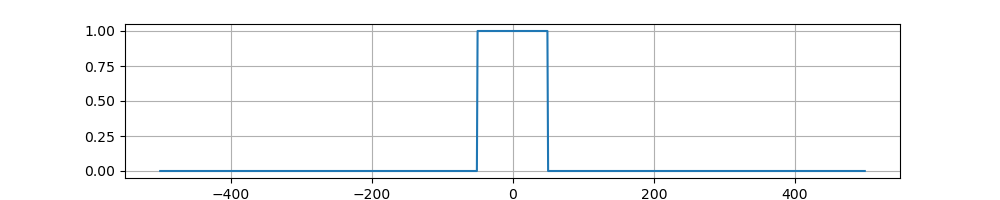

In [71]:
# Dessin de la fonction Rectangle
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt
 
# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 1000;
Pupille=np.zeros(Largeur_totale);
Largeur_fente = 100
x = np.arange(-Largeur_totale /2,Largeur_totale /2)
Pupille[int(Largeur_totale /2-Largeur_fente/2):int(Largeur_totale /2+Largeur_fente/2)]=1

plt.figure(figsize=(10,2))
plt.plot(x,Pupille)
plt.grid()           

# TF de la fonction Rectangle

(-0.5, 0.5)

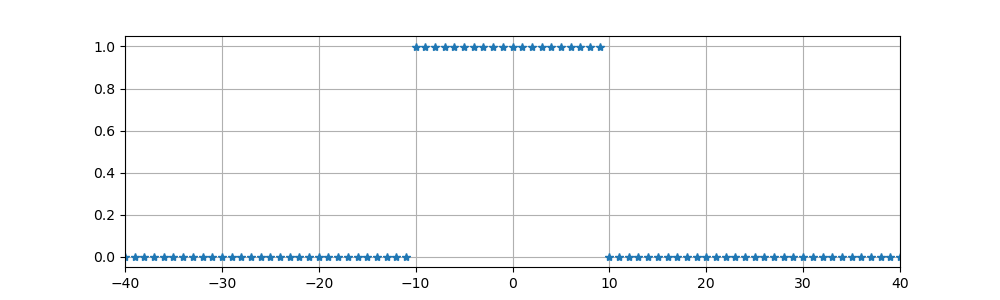

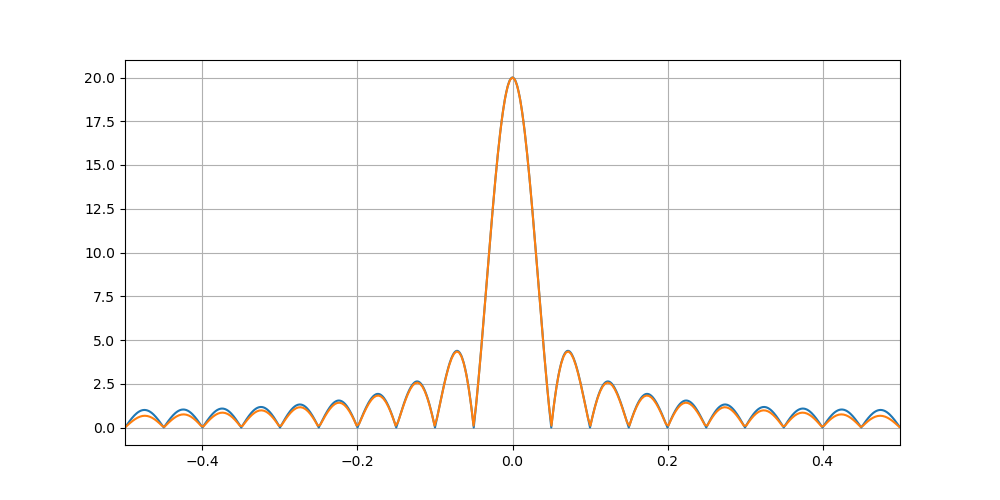

In [72]:
# Dessin de la TF de la fonction Rectangle
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 1000;
Pas = 1
Largeur_fente = 20

Pupille=np.zeros(Largeur_totale);
x = np.arange(-Largeur_totale /2,Largeur_totale /2, Pas)
Pupille[int(Largeur_totale /2-Largeur_fente/2):int(Largeur_totale /2+Largeur_fente/2)]=1

Fourier=np.zeros(Largeur_totale);                                   # Initialisation vecteur du plan de Fourier 
Fourier=np.fft.fft(Pupille);                                        # utilisation de la fft (fast fourier transform)
Fourier=np.fft.fftshift(Fourier);                                   # fréquence nulle au centre (décalage du spectre)

Freq_Resolution=1/Largeur_totale                                    # Résolution dans le spectre en fréquences spatiales
Fred_Etendue=1/Pas                                                  # Etendue des fréquences spatiales
u = np.arange(-Fred_Etendue/2,Fred_Etendue/2,Freq_Resolution)       # Abscisse en fréquences

Fourier_Calcul = abs(Largeur_fente*np.sinc(np.pi*Largeur_fente*u))  # TF calculée avec la fonction Sinc
u2 = u*np.pi                                                        # Abscisse en fréquences (corrigé de pi)

plt.figure(figsize=(10,3))
plt.plot(x,Pupille,'*')
plt.grid()
plt.xlim([-40, 40])

plt.figure(figsize=(10,5))
plt.plot(u,abs(Fourier))
plt.plot(u2,Fourier_Calcul)
plt.grid()
plt.xlim([-0.5, 0.5])


On dessine ensuite la fonction sinus cardinal (en bleu : sinc, en orange : |sinc|)

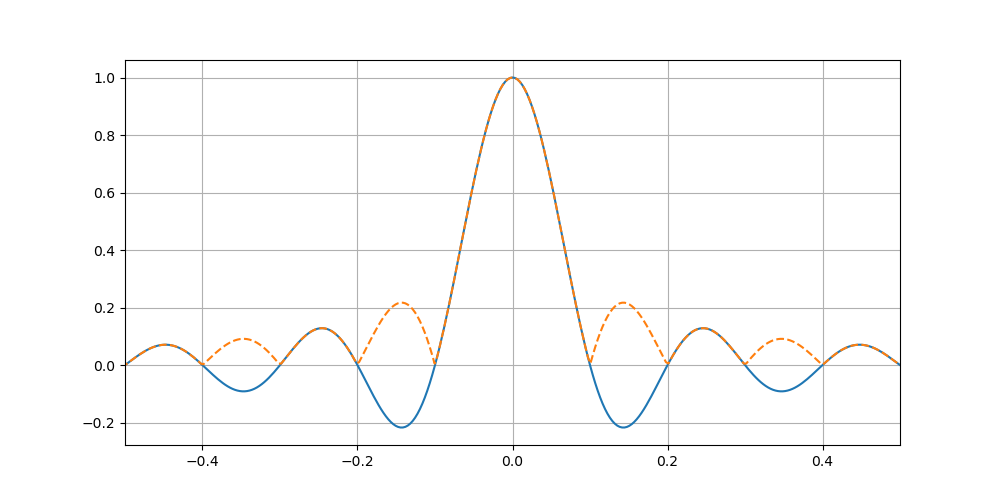

In [86]:
Largeur_fente = 10
Fourier_Calcul = np.sinc(np.pi*Largeur_fente*u)
plt.figure(figsize=(10,5));
plt.plot(u2,Fourier_Calcul);
plt.plot(u2,abs(Fourier_Calcul),'--')
plt.grid()
plt.xlim([-0.5, 0.5]);

# Tracé de la fonction Triangle

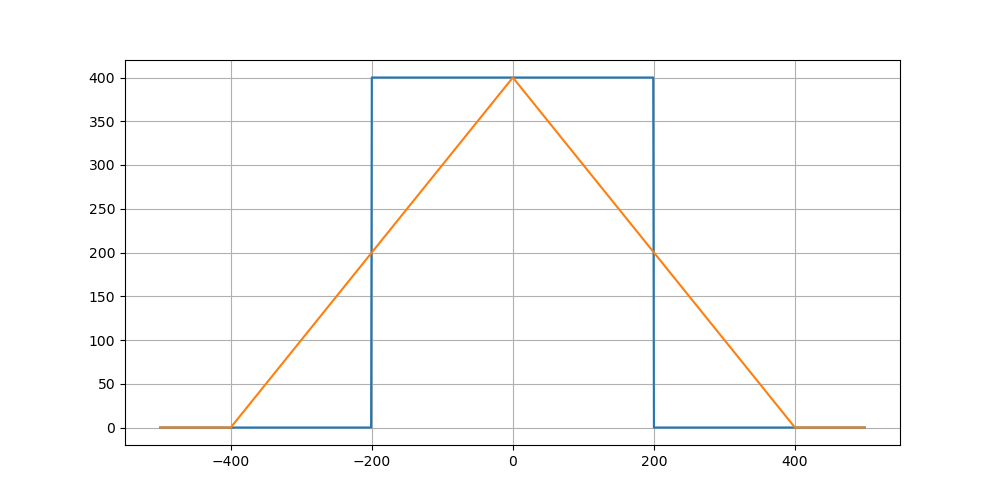

In [106]:
# Dessin de la fonction Triangle 
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 1000;
Largeur_fente = 400
Pas = 1

Rectangle = np.zeros(Largeur_totale);
Triangle = np.zeros(2*Largeur_totale);
x = np.arange(-Largeur_totale/2,Largeur_totale/2, Pas)
Rectangle[int(Largeur_totale /2-Largeur_fente/2):int(Largeur_totale /2+Largeur_fente/2)]=1
Triangle = np.convolve(Rectangle, Rectangle,'Same')
plt.figure(figsize=(10,5))
plt.plot(x,Largeur_fente*Rectangle)
plt.plot(x,Triangle)
plt.grid()

# TF de la fonction Triangle

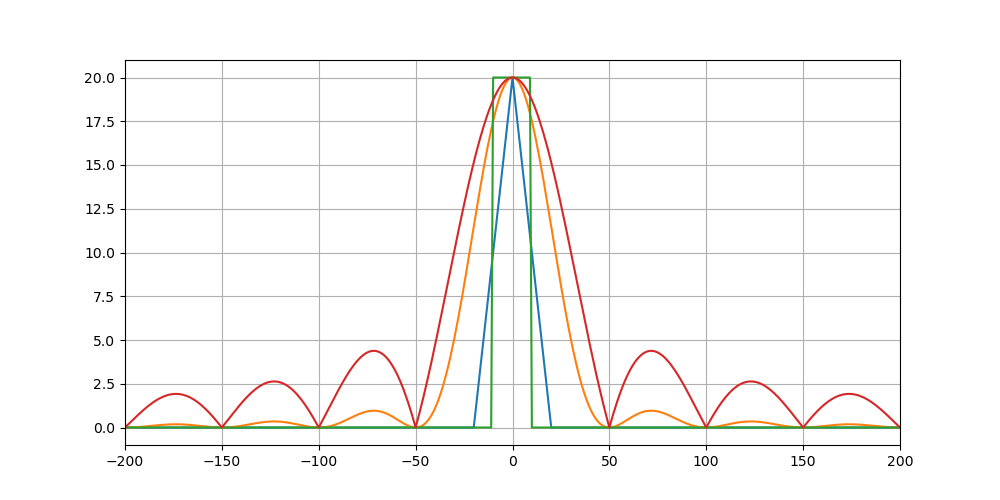

In [8]:
# Dessin de la TF de la fonction Triangle 
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget
Largeur_totale = 1000;
Largeur_fente = 20
Pas = 1

Rectangle = np.zeros(Largeur_totale);
Triangle = np.zeros(2*Largeur_totale);
x = np.arange(-Largeur_totale/2,Largeur_totale/2, Pas)

Rectangle[int(Largeur_totale /2-Largeur_fente/2):int(Largeur_totale /2+Largeur_fente/2)]=1
Triangle = np.convolve(Rectangle, Rectangle,'Same')

Fourier=np.zeros(Largeur_totale); 
Fourier=np.fft.fft(Rectangle);                                        
Fourier=np.fft.fftshift(Fourier); 
Maxfourier=np.max(Fourier)
Fourier=Fourier/Maxfourier*Largeur_fente

Fourier2=np.zeros(Largeur_totale); 
Fourier2=np.fft.fft(Triangle);
Fourier2=np.fft.fftshift(Fourier2);
Maxfourier2=np.max(Fourier2)
Fourier2=Fourier2/Maxfourier2*Largeur_fente

plt.figure(figsize=(10,5))
plt.plot(x,Triangle)
plt.plot(x,abs(Fourier2))
plt.plot(x,Largeur_fente*Rectangle)
plt.plot(x,abs(Fourier))
plt.xlim([-200, 200]);
plt.grid()

# Peigne de Dirac

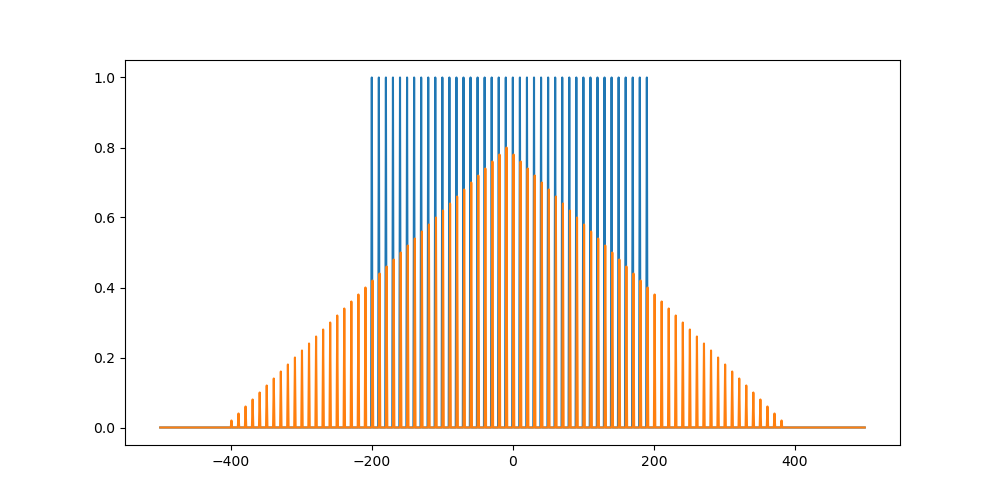

In [22]:
# Dessin d'un peigne de Dirac et convolution d'un peigne
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 1000;
Largeur_fente = 1                                          # Delta de Dirac
Pas = 1
Largeur_Peigne = 400                 
Pas_Peigne = 10

x = np.arange(-Largeur_totale/2,Largeur_totale/2, Pas)
Peigne=np.zeros(Largeur_totale);
Conv_Peigne = np.zeros(Largeur_totale);

for i in range(int(Largeur_totale/2-Largeur_Peigne/2),int(Largeur_totale/2+Largeur_Peigne/2),Pas_Peigne):
    Peigne[i]=1
    
Conv_Peigne=np.convolve(Peigne,Peigne,'Same')
plt.figure(figsize=(10,5))
plt.plot(x,Peigne)
plt.plot(x,Conv_Peigne/50)

# TF d'une fonction cosinus limitée

(-0.1, 0.1)

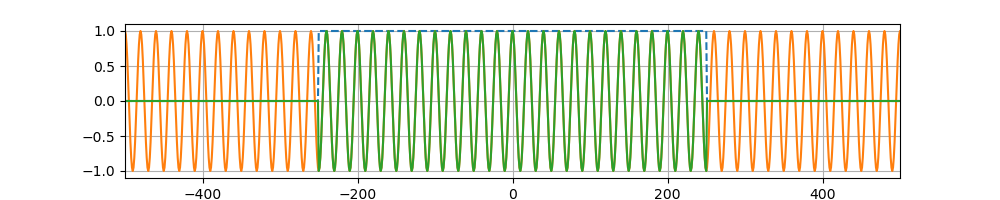

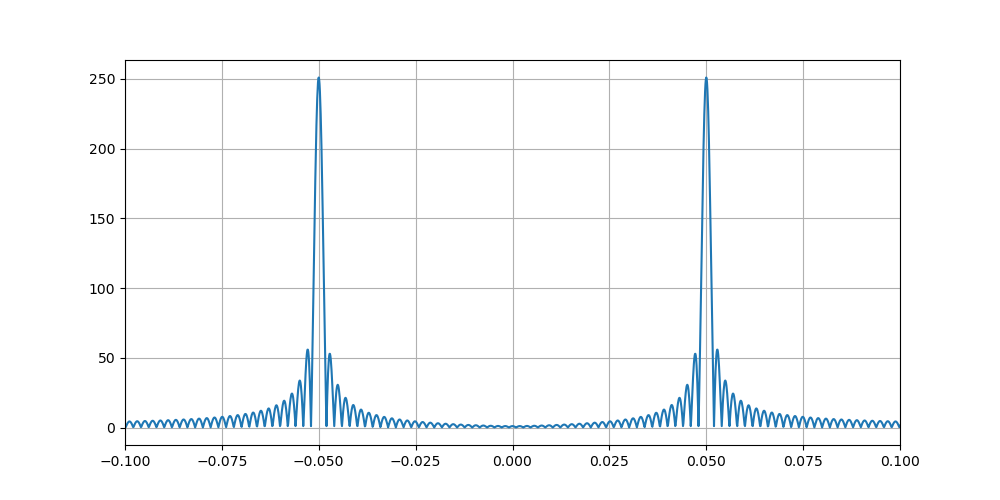

In [38]:
# TF d'une fonction cosinus limitée
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

# Uniquement si les widgets ont été installés (pas obligatoire)
import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 10000;
Rectangle=np.zeros(Largeur_totale);
Largeur_Rectangle = 500                
Pas = 1
x = np.arange(-Largeur_totale/2,Largeur_totale/2,Pas)
Rectangle[int(Largeur_totale/2-Largeur_Rectangle/2):int(Largeur_totale/2+Largeur_Rectangle/2)+1]=1
CosInfini=np.cos(np.pi*0.1*x)
CosFini=Rectangle*CosInfini

plt.figure(figsize=(10,2))
plt.plot(x,Rectangle,'--')
plt.plot(x,CosInfini)
plt.plot(x,CosFini)
plt.grid()
plt.xlim([-500, 500])

Fourier=np.fft.fft(CosFini);
Fourier=np.fft.fftshift(Fourier);
maxfourier=np.max(fourier)
Fourier=Fourier/maxfourier

Freq_Resolution=1/Largeur_totale                                 
Fred_Etendue=1/Pas                                                
u = np.arange(-Fred_Etendue/2,Fred_Etendue/2,Freq_Resolution)       

plt.figure(figsize=(10,5))
plt.plot(u,abs(Fourier))
plt.grid()
plt.xlim([-0.1, 0.1])

# TF d'un réseau

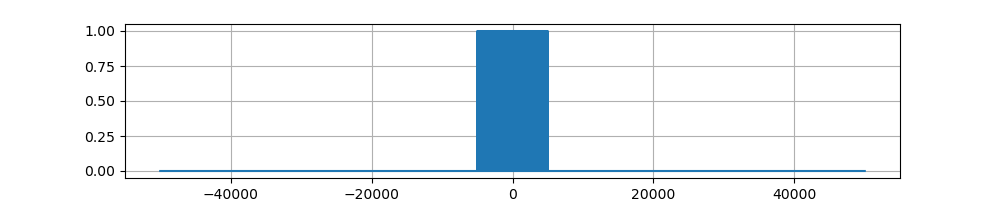

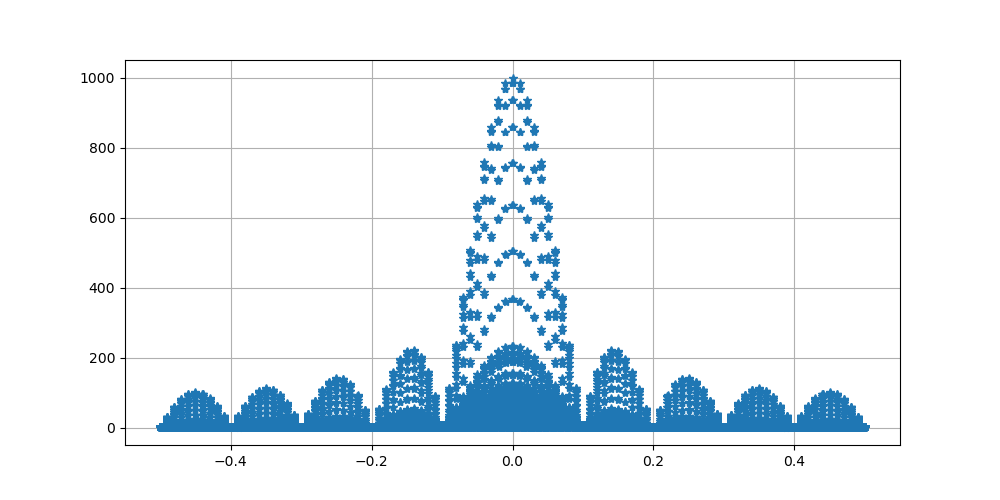

In [56]:
# TF d'une réseau limité 
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 100000;
Pas = 1
LargeurGrand = 10000              
LargeurPetit = 10                
Pas_Reseau = LargeurPetit *10

Rectangle=np.zeros(Largeur_totale);
Peigne=np.zeros(Largeur_totale);
ReseauFini=np.zeros(Largeur_totale);

x = np.arange(-Largeur_totale/2,Largeur_totale/2,Pas)

for i in range(0,int(Largeur_totale),Pas_Reseau):
    Peigne[i-int(LargeurPetit/2):i+int(LargeurPetit/2)]=1
    
Rectangle[int(Largeur_totale/2-LargeurGrand/2):int(Largeur_totale/2+LargeurGrand/2)+1]=1

ReseauFini=Rectangle*Peigne
plt.figure(figsize=(10,2))
plt.plot(x,ReseauFini)
plt.grid()

fourier=np.fft.fft(ReseauFini);
fourier=np.fft.fftshift(fourier);

Freq_Resolution=1/Largeur_totale                                 
Fred_Etendue=1/Pas                                                
u = np.arange(-Fred_Etendue/2,Fred_Etendue/2,Freq_Resolution) 

plt.figure(figsize=(10,5))
plt.plot(u,abs(fourier),'*')
plt.grid()

# Apodisation d'une fente

(-0.2, 0.2)

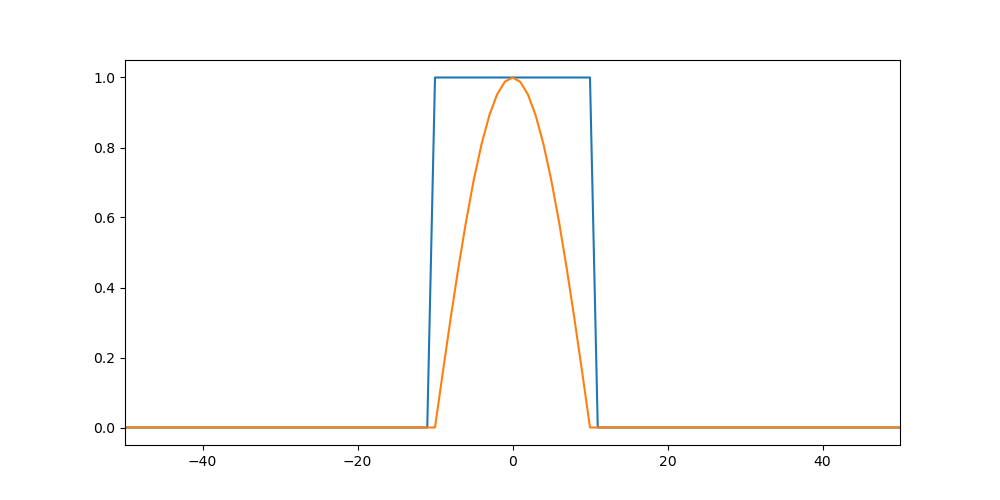

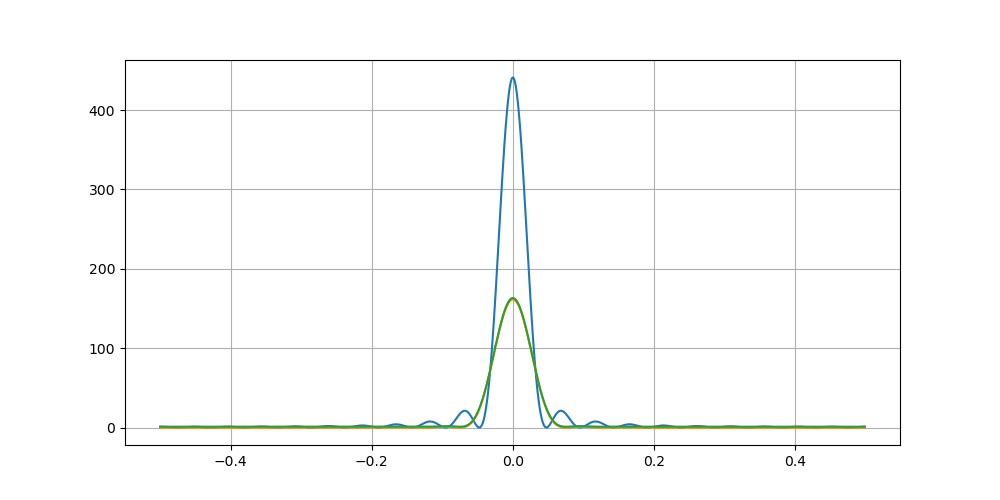

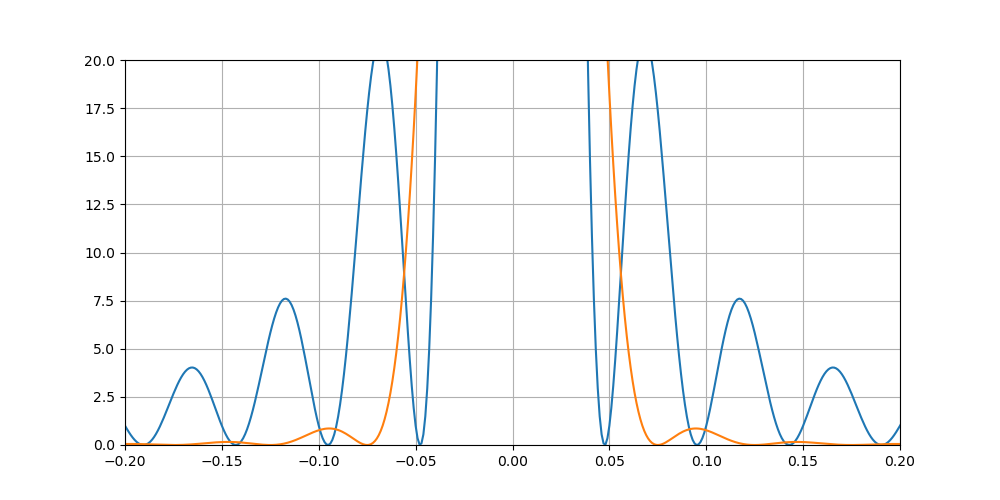

In [16]:
# Apodisation
# DG - L3PA - 2022

import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

Largeur_totale = 100000;
Pas_x = 1

Largeur_totale = 1000
Hauteur = 200
Largeur_fente = 20
Fente=np.zeros(Largeur_totale)
FenteApo=np.zeros(Largeur_totale)
xCos=np.zeros(Largeur_totale)

x = np.arange(-Largeur_totale/2,Largeur_totale/2,Pas_x)
xCos = np.cos(x*np.pi/Largeur_fente)

Debut = int(Largeur_totale/2-Largeur_fente/2)
Fin = int(Largeur_totale/2+Largeur_fente/2)+1
Fente[Debut:Fin]=1

FenteApo[Debut:Fin] = xCos[Debut:Fin]

plt.figure(figsize=(10,5))
plt.plot(x,Fente)
plt.plot(x,FenteApo)
plt.xlim([-50, 50])

fourier=np.fft.fft(Fente);
fourier=np.fft.fftshift(fourier);

fourier2=np.fft.fft(FenteApo);
fourier2=np.fft.fftshift(fourier2);

FreqResolution=1/Largeur_totale
FredEtendue=1
u = np.arange(-0.5,0.5,FreqResolution)

Calcul=np.cos(np.pi*u*Largeur_fente)**2*4*Largeur_fente**2/np.pi**2/(1-4*u*u*Largeur_fente**2)**2

plt.figure(figsize=(10,5))
plt.plot(u,abs(fourier)**2)
plt.plot(u,abs(fourier2)**2)
plt.plot(u,1+Calcul)
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(u,abs(fourier)**2)
plt.plot(u,abs(fourier2)**2)
plt.grid()
plt.ylim(0,20)
plt.xlim(-0.2,0.2)


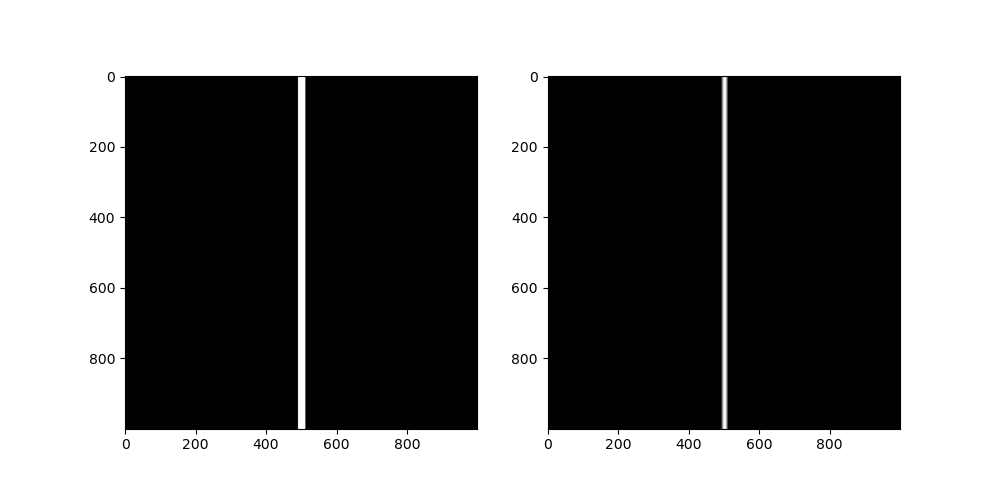

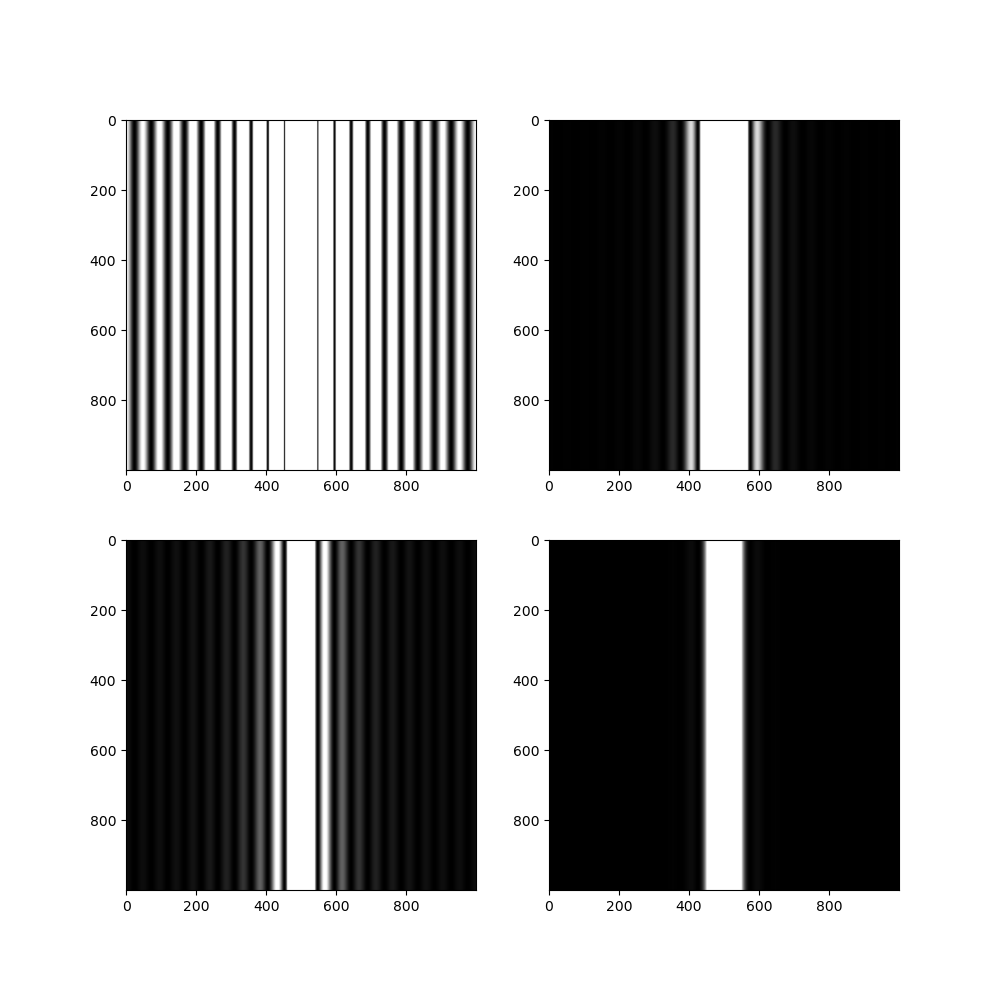

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(121)
Pupille1=np.zeros((Largeur_totale,Largeur_totale))
Pupille1[:,:]=Fente
plt.set_cmap("gray")
plt.imshow(Pupille1)

plt.subplot(122)
Pupille2=np.zeros((Largeur_totale,Largeur_totale))
Pupille2[:,:]=FenteApo
plt.set_cmap("gray")
plt.imshow(Pupille2)

plt.figure(figsize=(10,10))

seuil = 1 

plt.subplot(221)
Diffraction=np.zeros((Largeur_totale,Largeur_totale))
Intensite=abs(fourier)**2
# seuillage
Intensite_seuil = np.where(Intensite > seuil, seuil, Intensite)
Diffraction[:,:]=Intensite_seuil
plt.imshow(Diffraction)
#plt.colorbar(orientation="horizontal") 

plt.subplot(222)
Diffraction2=np.zeros((Largeur_totale,Largeur_totale))
Intensite2=abs(fourier2)**2
Intensite_seuil2 = np.where(Intensite2 > seuil, seuil, Intensite2)
Diffraction2[:,:]=Intensite_seuil2
plt.set_cmap("gray")   #terrain
plt.imshow(Diffraction2)
#plt.colorbar(orientation="horizontal") 

seuil=20
plt.subplot(223)
Intensite_seuil = np.where(Intensite > seuil, seuil, Intensite)
Diffraction[:,:]=Intensite_seuil
plt.imshow(Diffraction)

plt.subplot(224)
Intensite_seuil2 = np.where(Intensite2 > seuil, seuil, Intensite2)
Diffraction2[:,:]=Intensite_seuil2
plt.imshow(Diffraction2)

